In [0]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Load the MNIST**

In [3]:
# Load the letter recognition dataset.
# The dataset can be downloaded here: http://yann.lecun.com/exdb/mnist/
# OR https://www.kaggle.com/c/digit-recognizer/data.

# Load the MNIST and split into train and test sets.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


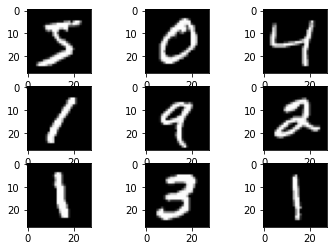

In [5]:
# Create a grid of 3x3 images.
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

### **Image Augmentation**

In [0]:
# Reshape to be [samples][width][height][channels].
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [0]:
# Convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
X_train/=255
X_test/=255

In [0]:
num_classes = 10

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [0]:
# Use ImageDataGenerator() function to augment images.
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

In [0]:
# Fit parameters from data
datagen.fit(X_train)

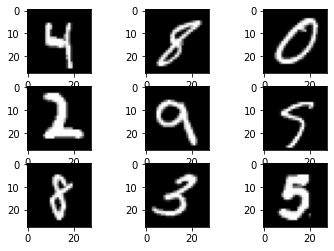

In [12]:
# Configure batch size and retrieve one batch of images.
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# Create a grid of 3x3 images.
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

### **Modeling**

In [0]:
# Three steps to create a CNN
# 1. Convolution
# 2. Activation
# 3. Pooling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))

model.add(Activation('softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)       

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#### **Train**

In [0]:
batch_size = 128
epochs = 12

In [19]:
%%time
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.1749 - val_accuracy: 0.9435
Epoch 2/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0287 - val_accuracy: 0.9904
Epoch 3/12
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0200 - accuracy: 0.9939 - val_loss: 0.0643 - val_accuracy: 0.9801
Epoch 4/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0256 - val_accuracy: 0.9919
Epoch 5/12
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0128 - accuracy: 0.9959 - val_loss: 0.0414 - val_accuracy: 0.9860
Epoch 6/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0793 - val_accuracy: 0.9756
Epoch 7/12
60000/60000 [==============================] - 178s

### **Plot Loss and Accuracy**

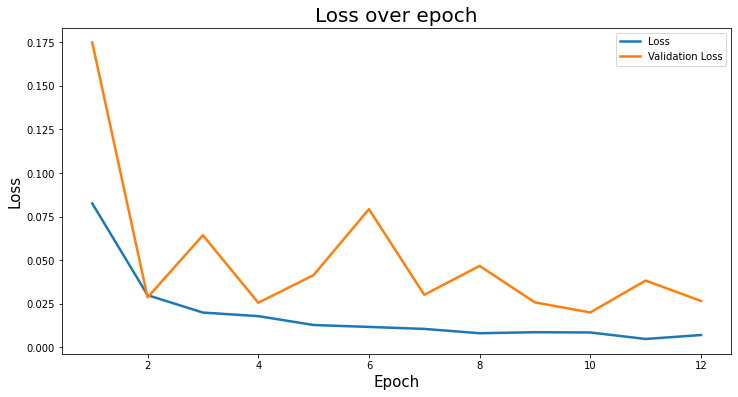

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs)+1, history.history['loss'], label='Loss', linewidth=2.5)
plt.plot(np.arange(epochs)+1, history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Loss over epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()
plt.show()

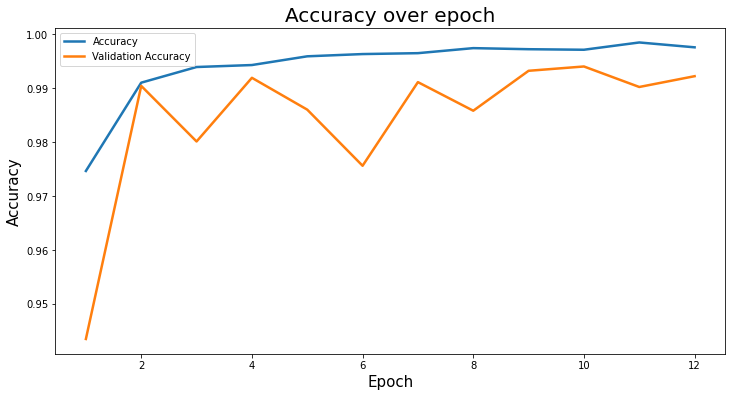

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs)+1, history.history['accuracy'], label='Accuracy', linewidth=2.5)
plt.plot(np.arange(epochs)+1, history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Accuracy over epoch', fontsize=20)

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.legend()
plt.show()

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02662160593689382
Test accuracy: 0.9922000169754028


In [33]:
%%time
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})

CPU times: user 15.7 s, sys: 456 ms, total: 16.2 s
Wall time: 8.47 s


In [34]:
sub.head(20)

,Actual,Predictions
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [35]:
X_test.shape

(10000, 28, 28, 1)

18


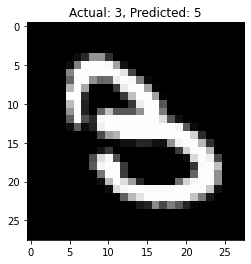

340


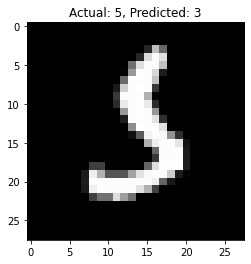

449


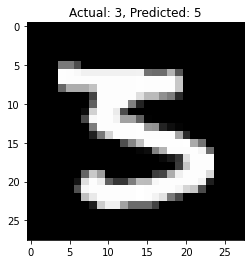

625


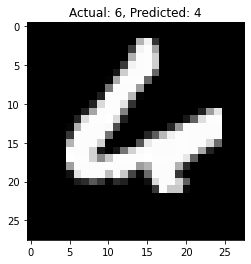

646


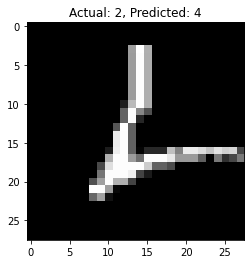

689


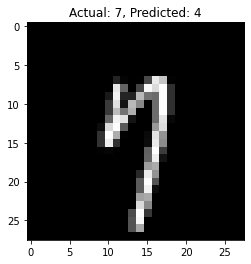

938


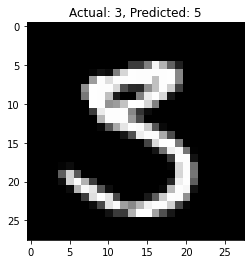

947


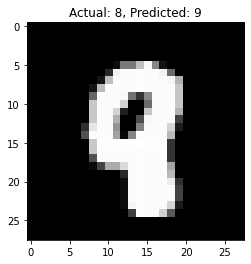

In [80]:
# Plot if actual and predicted digits are different.
#for i in range(0, len(sub)):
for i in range(0, 1000):
    if sub.values[i,0] != sub.values[i,1]:
        print(i)
        tmp = X_test[i,:,:,:]
        tmp = tmp.reshape(28, 28)
        plt.imshow(tmp, cmap='gray')
        plt.title('Actual: %s, Predicted: %s' % (str(sub.values[i,0]), str(sub.values[i,1])))
        pyplot.show()